**Objetivos da aula:**

*   Conhecer e praticar a Transformada de Hough para linhas e circulos
*   conhecer e praticar com os operadores de dilatação e erosão
*   conhecer e praticar com os operadores de abertura e fechamento

### **Transformada de Hough**

A transformada de Hough é um metodo utilizado para reconhecimento de padrões simples como retas e circulos. a aplicação da técnica é feita em contornos de imagem. É uma técnica muito popular e muito poderosa, pois possibilita detectar linhas e circulos em imagens com pouco visível ou muito ruidosa. 

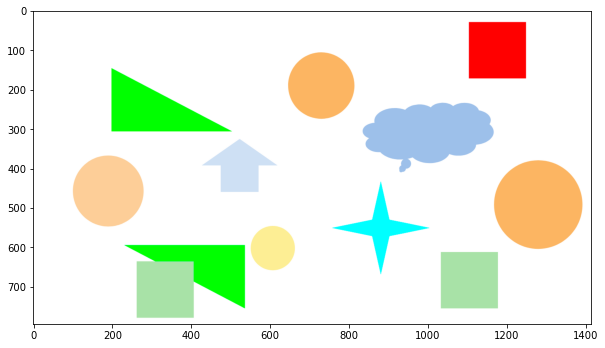

In [4]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

### **DETECÇÃO DE CIRCULOS**


Vamos fazer a deteção de circulos da imagem forma.

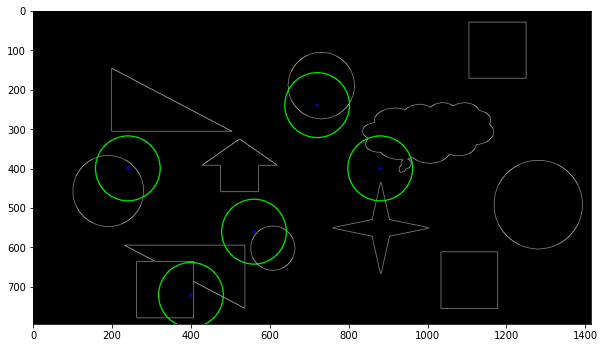

In [2]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)
circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=160,minDist=100,param1=200,param2=100,minRadius=50,maxRadius=150)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb


if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
        
plt.figure(figsize = (10,10))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255); plt.show()

O resultado não ficou bom, pois há muitos falsos positivos detectados, neste caso precisamos alterar os parametros da transformada de hough. Vamos ver o que é cada um deles.

`
circles=cv2.HoughCircles(image,method=cv2.HOUGH_GRADIENT,dp,minDist,param1,param2,minRadius,maxRadius)
`

- image: imagem de entrada na escala de ciza. 
- method: Define o metódo de detecção de circulos.
- dp: relação entre o tamanho da imagem e o tamanho do acumulador. Um dp grande "pega" bordas mais tênues.
- minDist: Distância minima entre centros (x,y) dos circulos detectados
- param1: Valor do gradiente usado para lidar com a detecção de bordas
- param2: Limiar do Acumulador usado pelo metódo. Se muito baixo, retorna mais circulos (incluindo círculos falsos). Se mais alto, mais círculos serão potencialmente retornados.
- minRadius: Raio minimo (em pixels).
- maxRadius: Raio máximo (em pixels).

### DESAFIO 1

Faça a alteração dos parametros para a transformada de Hough afim de detectar apenas os circulos da imagem. 

Dica: Altere um parametro por vez e analise o resultado. 

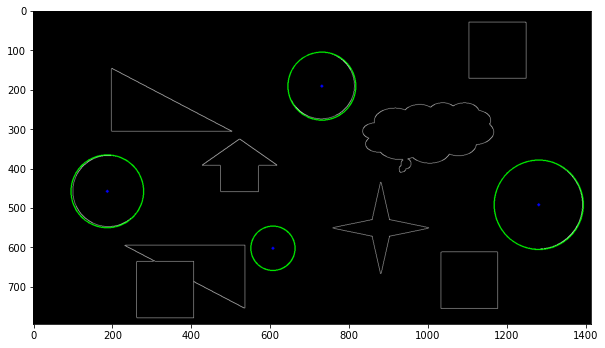

In [21]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray,50,150)
circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=5,minDist=100,param1=200,param2=300,minRadius=20,maxRadius=150)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb


if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
        
plt.figure(figsize = (10,10))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255); plt.show()

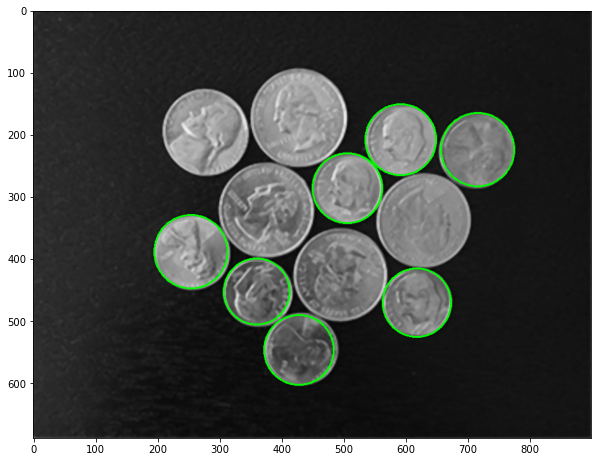

In [22]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv.imread('coins.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,param1=50,param2=40,minRadius=45,maxRadius=60)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    
plt.figure(figsize = (10,10))   
plt.imshow(cimg)

### DESAFIO 2

Modifique este código para detectar, segmentar e exibir a quantidade de moedas de 1 dólar. Neste imagem, temos quatro moedas de 1 dólar. 

In [5]:
#Implemente seu código






### **DETECÇÃO DE RETAS**


De forma semelhante ao **CV2.HOUGHCIRCLE()**, para detecção de retas usamos o **cv2.HoughLines()** ou **cv2.HoughLinesP()** o segundo faz uma estimativa probabilistica. 

`
cv.HoughLinesP( image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])
`


- imagem: Imagem de entrada em escala de cinza.
- rho: Resolução da distância do acumulador em pixeis.
- teta: Resolução do ângulo de rotação do acumulador em radianos, normalmente 1 Grau.
- threshold: Limiar do acumulador. Só são devolvidas as linhas que obtêm votos suficientes ( >threshold ).
- minLineLineLength: Comprimento mínimo da linha. Segmentos de linha mais curtos do que isso são rejeitados.
- maxLineGap: Distância máxima permitida entre pontos considerados na mesma linha.



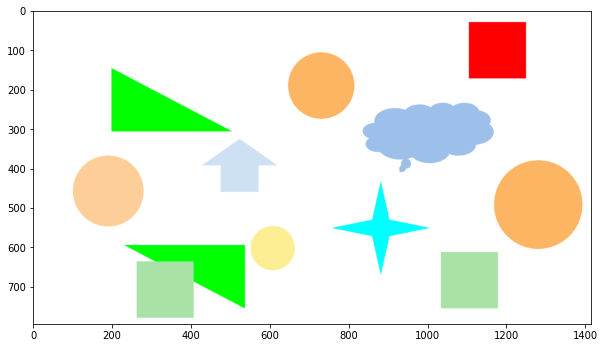

In [6]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

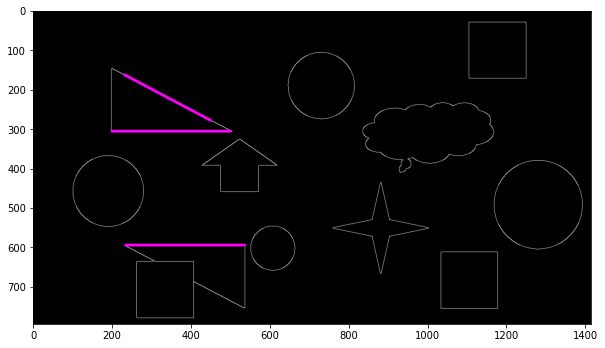

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)

lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 100, np.array([]), 180, 5)

hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 5)


plt.figure(figsize = (10,10))
plt.imshow(hough_img_rgb); plt.show()

### DESAFIO 3

Faça a alteração dos parametros para a transformada de Hough afim de detectar apenas todas as linhas da imagem. 

Dica: Altere um parametro por vez e analise o resultado. 

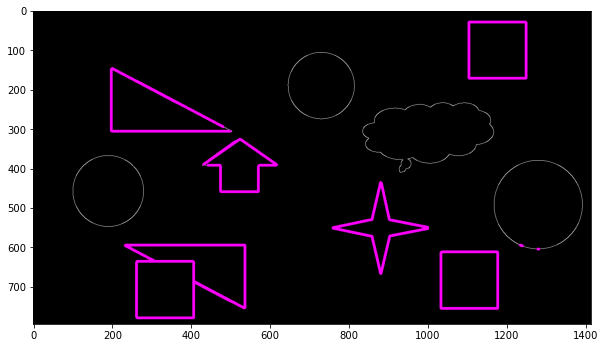

In [50]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('formas.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)

lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 52, np.array([]), 2, 10)

hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 5)


plt.figure(figsize = (10,10))
plt.imshow(hough_img_rgb); 
plt.show()

Exemplo mais prático, detecção de faixa por veiculos autonômos.

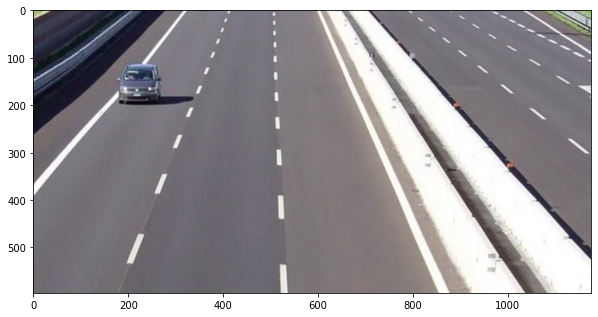

In [9]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('rua.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

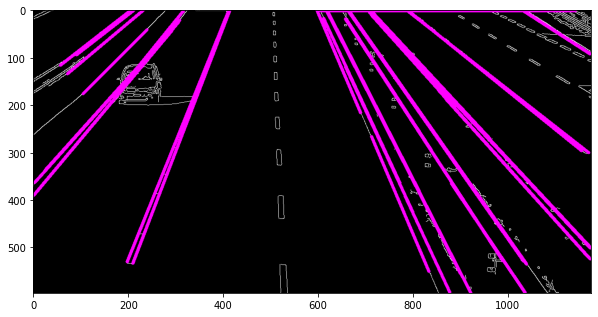

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,200)

lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 120, np.array([]), 10, 100)


hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 5)


plt.figure(figsize = (10,10))
plt.imshow(hough_img_rgb); plt.show()

### **MORFOLOGIA MATEMÁTICA**

A Morfologia Matemática (MM) é um modelo teórico para as imagens digitais construídas em cima da teoria dos reticulados e da topologia . É o fundamento do processamento de imagem morfológico, que é baseado nos operadores de deslocamento-invariante (translação invariante) baseados principalmente na adição de Minkowski.

#### <b>DILATAÇÃO BINÁRIA</b>

É uma transformação morfológica que combina dois conjuntos usando adição vetorial. Como o nome diz, o resultado será uma imagem “engordada”.

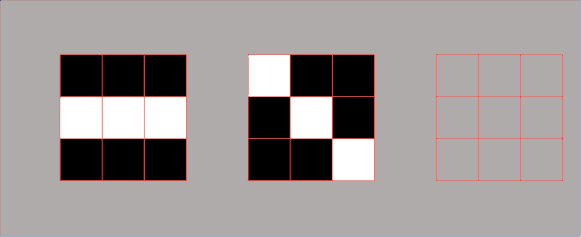

In [11]:
from IPython.display import Image
Image(open('dilatação.gif','rb').read())

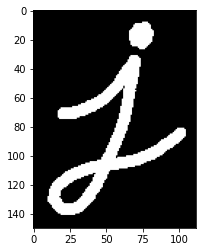

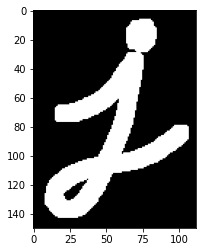

In [12]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

kernel = np.ones((5,5),np.uint8)

dilation = cv.dilate(img,kernel,iterations = 1)


plt.imshow(dilation, cmap="Greys_r", vmin=0, vmax=255); plt.show()

## Detectando contorno com dilatação

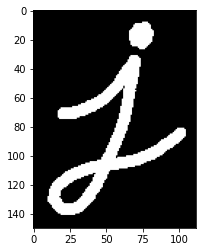

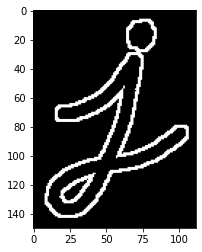

In [13]:
import cv2 as cv
import numpy as np

img = cv.imread('j.png',0)

plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

dst = img.copy()
kernel = np.ones((5,5),np.uint8)

dilation = cv.dilate(img,kernel,iterations = 1)

dst = dilation - img


plt.imshow(dst, cmap="Greys_r", vmin=0, vmax=255); plt.show()

#### <b>EROSÃO BINÁRIA</b>

A erosão basicamente encolhe uma imagem e pode ser vista como uma
transformação morfológica que combina dois conjuntos usando vetores
de subtração. Ela é expressa como a interseção de A e B. 

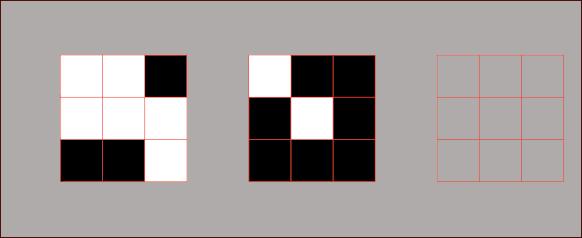

In [14]:
from IPython.display import Image
Image(open('erosao.gif','rb').read())

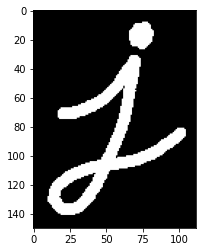

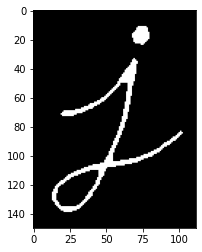

In [15]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

dst = img.copy()
kernel = np.ones((5,5),np.uint8)

erode = cv.erode(img,kernel,iterations = 1)

plt.imshow(erode, cmap="Greys_r", vmin=0, vmax=255); plt.show()

### DESAFIO 4

Utilizando a operação de erosão, calcule o contorno da imagem "j.png":

In [16]:
#implemente seu código...






#### <b>ABERTURA BINÁRIA</b>

A abertura em geral suaviza o contorno de uma imagem, quebra
estreitos e elimina proeminências delgadas, a operação de abertura e
usada também para remover ruídos da imagem.

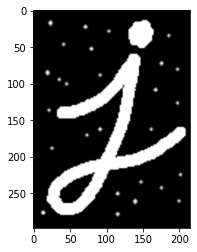

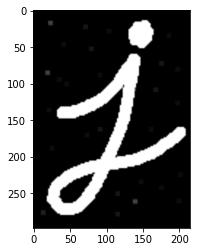

In [17]:
import cv2 as cv
import numpy as np
img = cv.imread('j-noise.png',0)
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

dst = img.copy()
kernel = np.ones((5,5),np.uint8)

opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plt.imshow(opening, cmap="Greys_r", vmin=0, vmax=255); plt.show()

#### <b>FECHAMENTO BINÁRIO</b>

O fechamento funde pequenos quebras e alargas golfos estreitos elimina
pequenos orifícios. Se uma abertura cria pequenos vazios na imagem, um
fechamento irá preencher ou fechar os vazios, estas operações podem
remover muitos dos pixels brancos com ruídos, ou seja basicamente ele e
igual a abertura só que primeiramente e feita a dilatação e após e feita a
erosão.

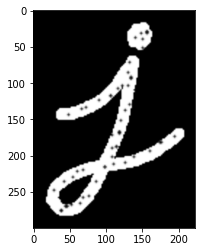

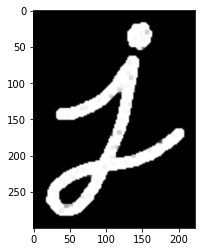

In [18]:
import cv2 as cv
import numpy as np
img = cv.imread('holes.png',0)
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

dst = img.copy()
kernel = np.ones((5,5),np.uint8)

closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap="Greys_r", vmin=0, vmax=255); plt.show()

### DESAFIO 5

Utilizando a operação abertura e depois a operação de fechamento binário, é esperado que a imagem volte ao original? Por que? 

In [19]:
### seu código ###